In [119]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hackerearth-competition/train.csv
/kaggle/input/hackerearth-competition/test.csv
/kaggle/input/churn-risk-rate-hackerearth-ml/sample_submission.csv
/kaggle/input/churn-risk-rate-hackerearth-ml/train.csv
/kaggle/input/churn-risk-rate-hackerearth-ml/test.csv


Same data is available on:
https://www.kaggle.com/imsparsh/churn-risk-rate-hackerearth-ml

In [120]:
# importing dataset: training data
train_df=pd.read_csv('../input/churn-risk-rate-hackerearth-ml/train.csv',index_col='customer_id', na_values=['?'])
len(train_df.columns) #25 columns in total

24

In [121]:
# dataframe view
train_df.head()
train_df.shape

(36992, 24)

In [122]:
train_df.churn_risk_score.value_counts()
# we should get rid the extra category (-1)

 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64

In [123]:
train_df.drop(train_df[ train_df['churn_risk_score'] == -1 ].index, axis=0, inplace=True)

In [124]:
train_df.columns

Index(['Name', 'age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [125]:
# separating X and y
from sklearn.model_selection import train_test_split

X = train_df.copy()
y = train_df.churn_risk_score
train_df.drop(['churn_risk_score'], axis = 1,inplace=True)

X_train, X_valid, y_train, y_valid = train_test_split(train_df, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=1)

In [126]:
# importing dataset: test data
test_df=pd.read_csv('../input/churn-risk-rate-hackerearth-ml/test.csv',index_col='customer_id', na_values=['?'])
test_df.head()
test_df.columns

Index(['Name', 'age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback'],
      dtype='object')

## EDA

In [127]:
# dropping unnecessary columns
# Name - as it does not specify or contribute anything special in predicting churn_risk_score

# variable: referral_id
train_df.referral_id.dtype # dtype('O')
train_df.referral_id.unique() # variaous random numbers 
len(train_df.referral_id.unique()) #11359 - unique values


# variable: security_no
len(train_df['security_no'].unique()) # 36992 - all unique values

# I think this unique (almost unique) IDs will contribute less to the predictions, so will drop
X_train.drop(['referral_id', 'security_no', 'Name'], axis=1, inplace=True)
X_valid.drop(['referral_id', 'security_no', 'Name'], axis=1, inplace=True)
test_df.drop(['referral_id', 'security_no', 'Name'], axis=1, inplace=True)

In [128]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28663 entries, fffe43004900440035003600310037003000 to fffe43004900440031003500340039003600
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           28663 non-null  int64  
 1   gender                        28663 non-null  object 
 2   region_category               24439 non-null  object 
 3   membership_category           28663 non-null  object 
 4   joining_date                  28663 non-null  object 
 5   joined_through_referral       24446 non-null  object 
 6   preferred_offer_types         28437 non-null  object 
 7   medium_of_operation           24455 non-null  object 
 8   internet_option               28663 non-null  object 
 9   last_visit_time               28663 non-null  object 
 10  days_since_last_login         28663 non-null  int64  
 11  avg_time_spent                28663 non-null  float64
 12 

#### variable - Age

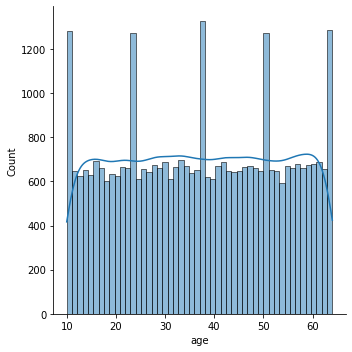

In [129]:
%matplotlib inline
sns.displot(X['age'], kde=True, bins=50) #seaborn histogram
# age seems to be uniformly distributed

<AxesSubplot:ylabel='age'>

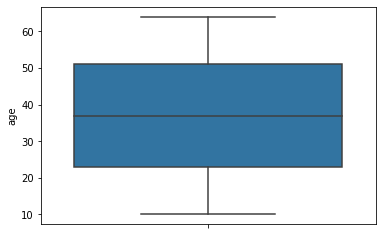

In [130]:
sns.boxplot(y=X['age'], hue=X['churn_risk_score']) 
# no outliers at all
# median age of customers around 40

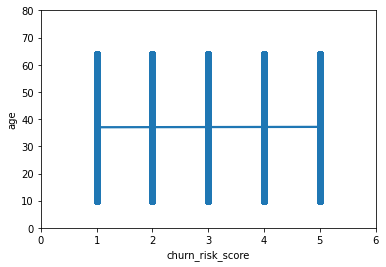

In [131]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.regplot(x='churn_risk_score',y='age', scatter=True, fit_reg=True, data=X, ax=ax)#seaborn scatter plot
ax.set(xlim=(0,6)) #to change axis ranges
ax.set_ylim(0,80)
plt.show()

#### variable - gender

<AxesSubplot:xlabel='churn_risk_score', ylabel='count'>

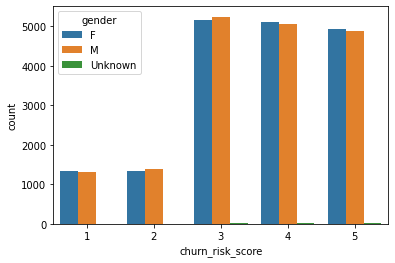

In [132]:
sns.countplot(x='churn_risk_score', hue='gender', data=X, palette="tab10")
# there is some variations over gender counts: thus gender is important variable

#### variable - region_category

<AxesSubplot:xlabel='churn_risk_score', ylabel='count'>

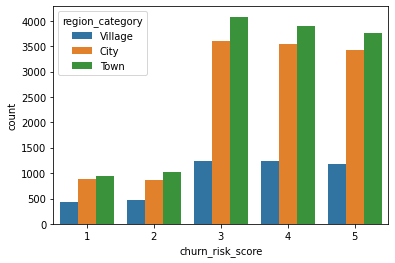

In [133]:
sns.countplot(x='churn_risk_score', hue='region_category', data=X, palette="tab10")
# there is some variations over region_category counts: thus region_category is important variable

<AxesSubplot:xlabel='churn_risk_score', ylabel='count'>

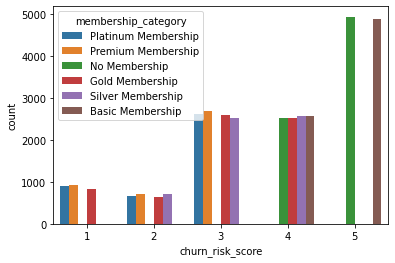

In [134]:
sns.countplot(x='churn_risk_score', hue='membership_category', data=X, palette="tab10")
# there is some variations over membership_category counts: thus membership_category is important variable

<AxesSubplot:xlabel='churn_risk_score', ylabel='count'>

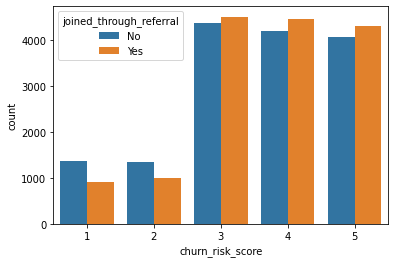

In [135]:
sns.countplot(x='churn_risk_score', hue='joined_through_referral', data=X, palette="tab10")
# there is some variations over joined_through_referral counts: thus joined_through_referral is important variable
# we have replaced '?' as na_value: cause ? might be representing not_known

<AxesSubplot:xlabel='churn_risk_score', ylabel='count'>

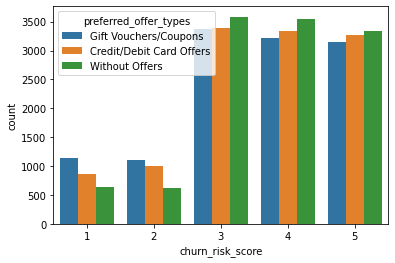

In [136]:
sns.countplot(x='churn_risk_score', hue='preferred_offer_types', data=X, palette="tab10")
# there is some variations over preferred_offer_types counts: thus preferred_offer_types is important variable

<AxesSubplot:xlabel='churn_risk_score', ylabel='count'>

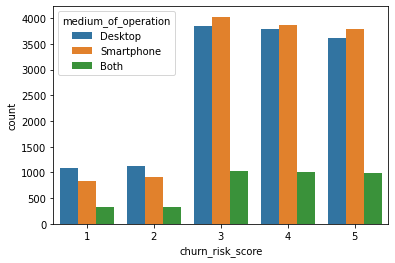

In [137]:
sns.countplot(x='churn_risk_score', hue='medium_of_operation', data=X, palette="tab10")
# there is some variations over medium_of_operation counts: thus medium_of_operation is important variable

<AxesSubplot:xlabel='churn_risk_score', ylabel='count'>

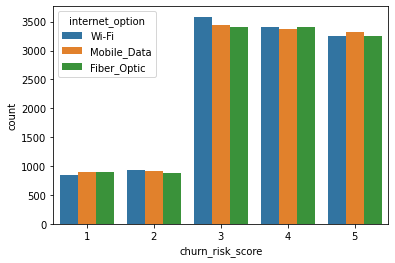

In [138]:
sns.countplot(x='churn_risk_score', hue='internet_option', data=X, palette="tab10")
# there is some variations over internet_option counts: thus internet_option is important variable

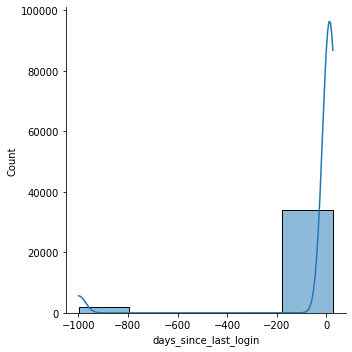

In [139]:
#days_since_last_login: int64  
sns.displot(X['days_since_last_login'], kde=True, bins=5) #seaborn histogram
#seems like there are negative values

<AxesSubplot:ylabel='days_since_last_login'>

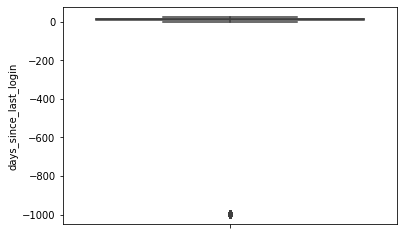

In [140]:
sns.boxplot(y=X['days_since_last_login'], hue=X['churn_risk_score'])
# the outlier is -999

In [141]:
X['days_since_last_login'].value_counts().sort_values()
# I think negative values will give wrong indication.

 26       78
 25      197
 1       323
 24      460
 2       590
 23      704
 3       830
 22      856
 4       967
 21      992
 20     1140
 5      1190
 6      1222
 19     1275
 18     1385
 7      1406
 8      1529
 17     1689
 9      1801
-999    1944
 16     2002
 10     2025
 11     2195
 15     2208
 14     2226
 13     2288
 12     2307
Name: days_since_last_login, dtype: int64

In [142]:
# replacing - with median, but with a trick
days_since_last_login__df = X[['days_since_last_login']]
type(days_since_last_login__df) #pandas.core.frame.DataFrame


days_since_last_login__df.drop(days_since_last_login__df[ days_since_last_login__df['days_since_last_login'] == -999 ].index, axis=0, inplace=True)
replace_median = np.median(days_since_last_login__df['days_since_last_login'])

# replacing with median
X_train['days_since_last_login'].replace(-999, int(replace_median), inplace=True)
X_valid['days_since_last_login'].replace(-999, int(replace_median), inplace=True)
X['days_since_last_login'].replace(-999, int(replace_median), inplace=True)

In [143]:
test_df['days_since_last_login'].unique()

array([  12,   11,   18, -999,    6,   15,    3,   14,    4,   22,   24,
          9,   10,   16,   19,   17,    7,   23,   13,    2,   21,    8,
          5,   20,    1,   25,   26])

In [144]:
# if test data also holds negative value
test_df['days_since_last_login'] = test_df['days_since_last_login'] .apply(lambda x : x if x > 0 else replace_median)

<AxesSubplot:ylabel='days_since_last_login'>

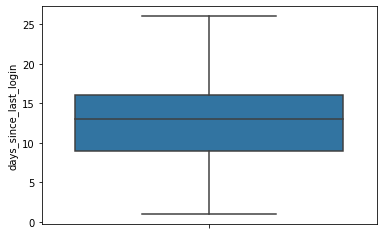

In [145]:
sns.boxplot(y=X['days_since_last_login'], hue=X['churn_risk_score'])
# the outlier is -999: which has been removed with median

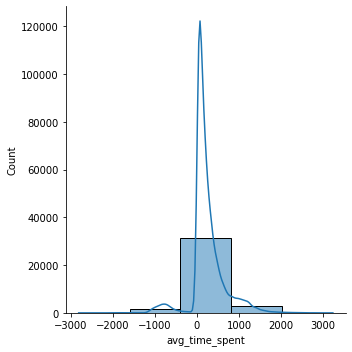

In [146]:
#avg_time_spent: float64  
sns.displot(X['avg_time_spent'], kde=True, bins=5) #seaborn histogram

<AxesSubplot:ylabel='avg_time_spent'>

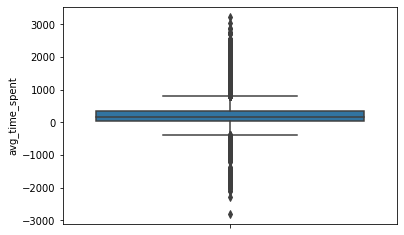

In [147]:
sns.boxplot(y=X['avg_time_spent'], hue=X['churn_risk_score'])
# a lot of outliers: mainly because of negative values

In [148]:

# will replace the negative avg time spent with abs values
X_train['avg_time_spent'] = X_train['avg_time_spent'].apply(lambda x : x if x > 0 else abs(x))
X_valid['avg_time_spent'] = X_valid['avg_time_spent'].apply(lambda x : x if x > 0 else abs(x))
X['avg_time_spent'] = X['avg_time_spent'].apply(lambda x : x if x > 0 else abs(x))
test_df['avg_time_spent'] = test_df['avg_time_spent'].apply(lambda x : x if x > 0 else abs(x))

<AxesSubplot:ylabel='avg_time_spent'>

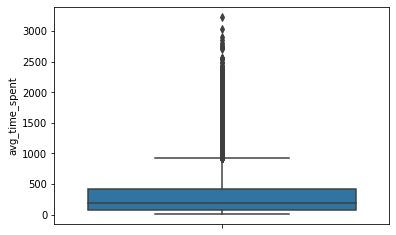

In [149]:
sns.boxplot(y=X['avg_time_spent'], hue=X['churn_risk_score'])
# a lot of outliers still but this are positive values and will have a positive impact on target variable

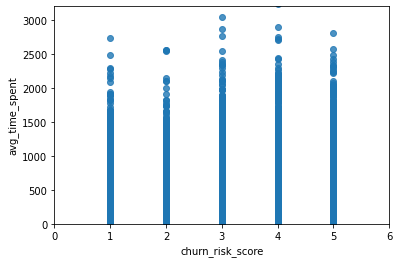

In [150]:
fig, ax = plt.subplots()
sns.regplot(x='churn_risk_score',y='avg_time_spent', scatter=True, fit_reg=False, data=X, ax=ax)#seaborn scatter plot
ax.set(xlim=(0,6)) #to change axis ranges
ax.set_ylim(0,3200)
plt.show()

# avg_time_spent has some effect on target variable

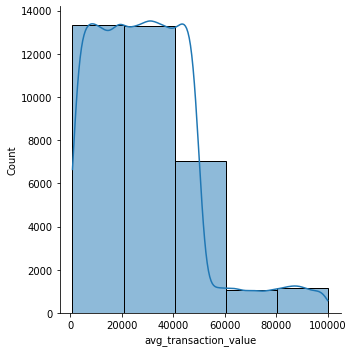

In [151]:
sns.displot(X['avg_transaction_value'], kde=True, bins=5) #seaborn histogram

<AxesSubplot:ylabel='avg_transaction_value'>

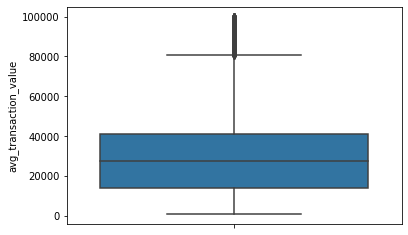

In [152]:
sns.boxplot(y=X['avg_transaction_value'], hue=X['churn_risk_score'])

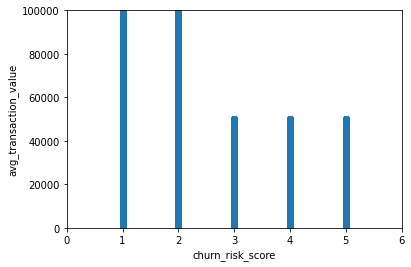

In [153]:
fig, ax = plt.subplots()
sns.regplot(x='churn_risk_score',y='avg_transaction_value', scatter=True, fit_reg=False, data=X, ax=ax)#seaborn scatter plot
ax.set(xlim=(0,6)) #to change axis ranges
ax.set_ylim(0,100000)
plt.show()

# avg_transaction_value has some effect on target variable, as it is low for last 3 categories of target variable

In [154]:
#avg_frequency_login_days: object -- but it shouldn't be object
X.avg_frequency_login_days.nunique() #1587
X.avg_frequency_login_days.value_counts()
# it is object because of 'Error' value
# but there are negative values too -- that also needs to be cleared


a=X.avg_frequency_login_days.unique()
#print(list(a))

In [155]:
# declaring temp_df to find median

temp_df = X[['avg_frequency_login_days']]
temp_df.drop(temp_df[ temp_df['avg_frequency_login_days'] == 'Error' ].index, axis=0, inplace=True)
temp_df = temp_df.astype('float64') # changing type to float for whole datatype
# df[["a", "b"]] = df[["a", "b"]].apply(pd.to_numeric)


# negative valued converted to pos
temp_df['avg_frequency_login_days'] = temp_df['avg_frequency_login_days'].apply(lambda x : x if x > 0 else abs(x))

# converting negative values to abs
replace_mean = np.mean(temp_df['avg_frequency_login_days'])

#transforming the columns
X_train['avg_frequency_login_days'].replace('Error', str(replace_mean), inplace=True)
X_train['avg_frequency_login_days'] = X_train['avg_frequency_login_days'].apply(pd.to_numeric)
X_train['avg_frequency_login_days'] = X_train['avg_frequency_login_days'].apply(lambda x : x if x > 0 else abs(x))

X_valid['avg_frequency_login_days'].replace('Error', str(replace_mean), inplace=True)
X_valid['avg_frequency_login_days'] = X_valid['avg_frequency_login_days'].apply(pd.to_numeric)
X_valid['avg_frequency_login_days'] = X_valid['avg_frequency_login_days'].apply(lambda x : x if x > 0 else abs(x))

X['avg_frequency_login_days'].replace('Error', str(replace_mean), inplace=True)
X['avg_frequency_login_days'] = X['avg_frequency_login_days'].apply(pd.to_numeric)
X['avg_frequency_login_days'] = X['avg_frequency_login_days'].apply(lambda x : x if x > 0 else abs(x))


test_df['avg_frequency_login_days'].replace('Error', str(replace_mean), inplace=True) #no errors will be thrown if "Error" didn't existed
test_df['avg_frequency_login_days'] = test_df['avg_frequency_login_days'].apply(pd.to_numeric)
test_df['avg_frequency_login_days'] = test_df['avg_frequency_login_days'].apply(lambda x : x if x > 0 else abs(x))


<AxesSubplot:ylabel='avg_frequency_login_days'>

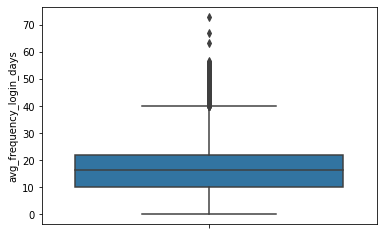

In [156]:
sns.boxplot(y=X['avg_frequency_login_days'], hue=X['churn_risk_score'])

<AxesSubplot:ylabel='points_in_wallet'>

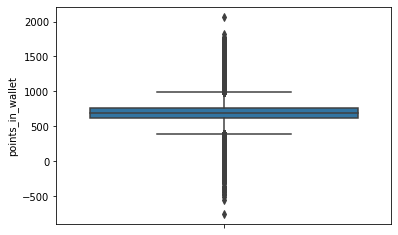

In [157]:
# points_in_wallet              
sns.boxplot(y=X['points_in_wallet'], hue=X['churn_risk_score'])
# presence of outliers but the value can be negative

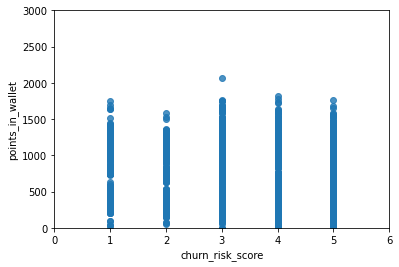

In [158]:
fig, ax = plt.subplots()
sns.regplot(x='churn_risk_score',y='points_in_wallet', scatter=True, fit_reg=False, data=X, ax=ax)#seaborn scatter plot
ax.set(xlim=(0,6)) #to change axis ranges
ax.set_ylim(0,3000)
plt.show()

# avg_transaction_value has some effect on target variable, as it is low for last 3 categories of target variable

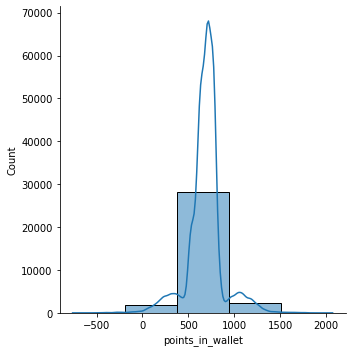

In [159]:
sns.displot(X['points_in_wallet'], kde=True, bins=5) #seaborn histogram

<AxesSubplot:xlabel='churn_risk_score', ylabel='count'>

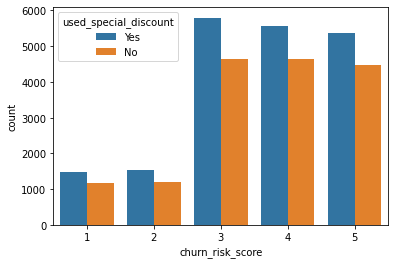

In [160]:
#used_special_discount         
sns.countplot(x='churn_risk_score', hue='used_special_discount', data=X, palette="tab10")
# there is some variations over used_special_discount counts: thus used_special_discount is important variable

<AxesSubplot:xlabel='churn_risk_score', ylabel='count'>

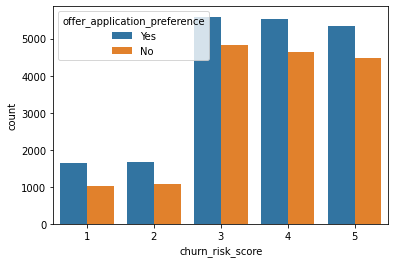

In [161]:
#offer_application_preference           
sns.countplot(x='churn_risk_score', hue='offer_application_preference', data=X, palette="tab10")
# there is some variations over offer_application_preference counts: thus offer_application_preference is important variable

<AxesSubplot:xlabel='churn_risk_score', ylabel='count'>

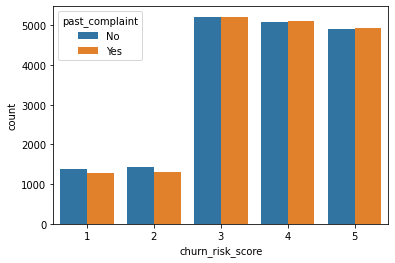

In [162]:
#past_complaint                           
sns.countplot(x='churn_risk_score', hue='past_complaint', data=X, palette="tab10")
# there is some variations over past_complaint counts: thus past_complaint is important variable

<AxesSubplot:xlabel='churn_risk_score', ylabel='count'>

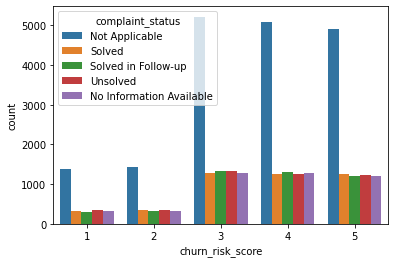

In [163]:
#complaint_status                                         
sns.countplot(x='churn_risk_score', hue='complaint_status', data=X, palette="tab10")
# there is some variations over complaint_status counts: thus complaint_status is important variable; although not that important

#### Working on time series data

In [164]:
# changing the joining_date
X['joining_date'].unique()

array(['2017-08-17', '2017-08-28', '2016-11-11', ..., '2017-12-11',
       '2016-09-25', '2017-04-15'], dtype=object)

In [165]:
X_valid['joining_date'].unique()

array(['2016-06-22', '2016-12-11', '2017-03-28', ..., '2017-07-10',
       '2016-07-31', '2015-06-30'], dtype=object)

In [166]:
def strToDate(df, col_name):
    temp_df = df
    day = []
    month = []
    year = []
    for i in range(len(df)):
        #print(df['joining_date'][i][:4])
        year.append(int(df['joining_date'][i][:4])) #0..3 represents year
        month.append(int(df['joining_date'][i][5:7])) # 5..6 represents month
        day.append(int(df['joining_date'][i][8:10])) # 8..9 represents the day
    
    # adding new columns in dataframe
    temp_df['day_of_joining']=day
    temp_df['month_of_joining']=month
    temp_df['year_of_joining']=year
    return temp_df

In [167]:
#changing the column data to year, month, day
X_valid = strToDate(X_valid, 'joining_date')
X_train = strToDate(X_train, 'joining_date')
X = strToDate(X, 'joining_date')
test_df = strToDate(test_df, 'joining_date')



In [168]:
#dropping the parent str joining_date column
X_valid.drop('joining_date',axis = 1,inplace=True)
X_train.drop('joining_date',axis = 1,inplace=True)
X.drop('joining_date',axis = 1,inplace=True)
test_df.drop('joining_date',axis = 1,inplace=True)

In [169]:
# checking if the time series column has been updated
X['day_of_joining'].unique()
X['day_of_joining'].dtype

dtype('int64')

In [170]:
# checking if the time series column last_visit_time
print(X['last_visit_time'].unique())
X['last_visit_time'].dtype

['16:08:02' '12:38:13' '22:53:21' ... '04:14:05' '09:50:03' '01:39:52']


dtype('O')

In [171]:
# changing the last_visit_time variable

def strToTime(df, col_name):
    temp_df = df
    hour = []
    minute = []
    second = []
    for i in range(len(temp_df)):
        hour.append(int(temp_df[col_name][i][:2]))
        minute.append(int(temp_df[col_name][i][3:5]))
        second.append(int(temp_df[col_name][i][6:8]))
        
    temp_df['minute_last_time_visit']=minute
    temp_df['hour_last_time_visit']=hour
    temp_df['sec_last_time_visit']=second
    
    temp_df.drop(col_name,axis=1,inplace=True) #deleting the column inside funtion itself
    
    return temp_df

In [172]:
# changing the time series data 'last_visit_time'
X_valid = strToTime(X_valid, 'last_visit_time')
X_train = strToTime(X_train, 'last_visit_time')
X = strToTime(X, 'last_visit_time')
test_df = strToTime(test_df, 'last_visit_time')

In [173]:
# checking if the time series column has been updated
print(X['minute_last_time_visit'].unique())
X['minute_last_time_visit'].dtype

[ 8 38 53 57 46 40 52 50 10 56 42 35  1 48 58 39 55  4 23 25 29 16  6  3
 36 31 45 17 11 22 51 27 21 13  5 32 12 24 20  7 34 41 26 30 37 44  0 59
 19  9 43 47 15 14 28 33 54  2 18 49]


dtype('int64')

### Working with the feedback variable: needs Natural language processing

In [174]:
X['feedback']

customer_id
fffe4300490044003600300030003800        Products always in Stock
fffe43004900440032003100300035003700       Quality Customer Care
fffe4300490044003100390032003600                    Poor Website
fffe43004900440036003000330031003600                Poor Website
fffe43004900440031003900350030003600                Poor Website
                                                  ...           
fffe43004900440035003500390036003100         No reason specified
fffe43004900440033003500380036003600       Poor Customer Service
fffe4300490044003500330034003100                    Poor Website
fffe43004900440031003200390039003000         No reason specified
fffe43004900440033003600340034003200       Quality Customer Care
Name: feedback, Length: 35829, dtype: object

In [175]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

#below method to do label encoding (as of now) on feedback column
def nlpProcessor(df, col_name):
    feedbacks = []
    for line in df[col_name]: # extracting all individual feedback
        feedbacks.append(line)
        
    lemmatizer = WordNetLemmatizer()

    feedback_corpus = []

    for i in range(len(feedbacks)):
        sentence = re.sub('[^a-zA-Z]',' ',feedbacks[i]) #repacing all other characters than alphabet
        sentence = sentence.lower() #converting every feedback to lowercase
        #print(sentence)
        
        sentence = sentence.split() #splitting sentence into words
        sentence = [lemmatizer.lemmatize(word) for word in sentence if not word in set(stopwords.words('english'))]
    
        sentence = ' '.join(sentence)
        feedback_corpus.append(sentence)
        
    
    temp_df = pd.DataFrame(feedback_corpus) #dataframe of unique feedbacks

    temp_df.columns=['feedback']

    unique_feedbacks = temp_df['feedback'].unique()

    #SCOPE OF IMPORVEMENT: we can replace feedbacks based upon sentiments of words
    # here we will just do encoding (kind of label encoding)
    for i in range(len(unique_feedbacks)):
        temp_df.replace(unique_feedbacks[i],i,inplace=True)


    df['feedback'] = temp_df['feedback']
    
    return df

In [176]:
# changing the time series data 'last_visit_time'
X_valid = nlpProcessor(X_valid, 'feedback')
X_train = nlpProcessor(X_train, 'feedback')
X = nlpProcessor(X, 'feedback')
test_df = nlpProcessor(test_df, 'feedback')

In [177]:
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]
numerical_cols = [col for col in X_train.columns if X_train[col].dtype in ["int64", "float64"]]
low_cardinality_categorical_cols = [col for col in categorical_cols if X_train[col].nunique() < 15]

In [178]:
# keeping only low category cols
# Keep selected columns only
my_cols = low_cardinality_categorical_cols + numerical_cols
X_train_selected = X_train[my_cols].copy() #deep copy
X_valid_selected = X_valid[my_cols].copy() #deep copy


In [179]:
test_df_selected = test_df[my_cols].copy()

In [180]:
# pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [181]:
from sklearn.metrics import accuracy_score, confusion_matrix


# Bundle preprocessing and modeling code in a pipeline
def fit_predict_score(model):
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)
                         ])

    # Preprocessing of training data, fit model 
    clf.fit(X_train_selected, y_train)

    # Preprocessing of validation data, get predictions
    preds = clf.predict(X_valid_selected)
    
    return preds
#     print("accuracy score:", round(model.score_*100,2))

    
    #confusion matrix
#     confusion_matrix_ = confusion_matrix(y_valid, preds)
#     print("confusion matrix:", confusion_matrix_)
    # principle diagonal element gives the count for correct (True positive, True negative)

#     #accuracy score
#     accuracy_score_ = accuracy_score(y_valid, preds)
#     print("accuracy score:", round(accuracy_score_*100,2))

        



In [182]:


# Defining model: 
models = [XGBClassifier(n_estimators=100, random_state=0),
          CatBoostClassifier(verbose=0), LGBMClassifier()]
          

model_name = ['XGBClassifier', 'CatBoostClassifier', 'LGBMClassifier']

# find the best model among them
for idx in range(3):
    print(model_name[idx])
    preds = fit_predict_score(models[idx])
    from sklearn.metrics import f1_score
    print(f1_score(y_valid, preds, average='weighted'))


# XGBClassifier: 0.737558536346357
# CatBoostClassifier: 0.730955372571863
# LGBMClassifier: 0.7306710840943358

XGBClassifier
[12:33:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.737558536346357
CatBoostClassifier
0.730955372571863
LGBMClassifier
0.7306710840943358


In [183]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', models[0])
                         ])

# Preprocessing of training data, fit model 
clf.fit(X_train_selected, y_train)

test_preds = clf.predict(test_df_selected) # as XGBClassifier seems to have higher score

# The lines below shows how to save predictions in format used for competition scoring


output = pd.DataFrame({'customer_id': test_df_selected.index,
                      'churn_risk_score': test_preds})
output.to_csv('submission.csv', index=False)

[12:33:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
